In [195]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib notebook

Test data

<IPython.core.display.Javascript object>


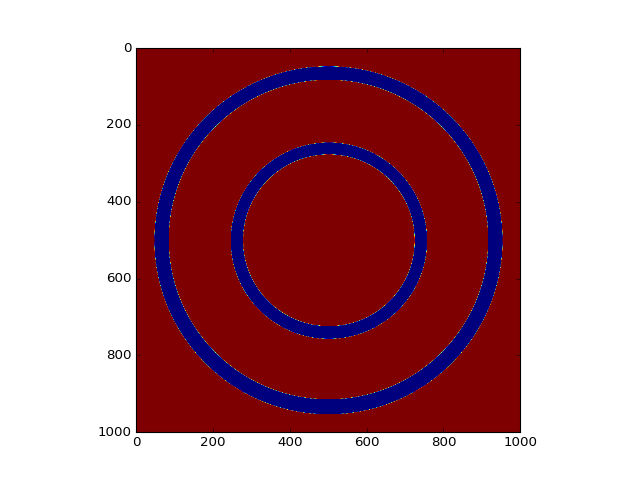

In [196]:
filename = 'radial_profile_data/test_2_circles.tif'
data = plt.imread(filename, 1)
data = np.array(data[:,:,0])
working_data = np.array(data)
plt.figure(0)
plt.imshow(data)

In [117]:
print(np.shape(data))
print(np.shape(working_data))
assert data is  not working_data

(10, 10)
(10, 10)


In [197]:
[height, width] = np.shape(data)
[y0, x0] = [int(height/2), int(width/2)]

center = [y0, x0]
print("center is: {},{}".format(center[0], center[1]))

angle_from_deg = 0 #degrees
angle_to_deg = 90 #degrees

angle_from_rad = np.deg2rad(angle_from_deg)
angle_to_rad = np.deg2rad(angle_to_deg)

print("angle from (rad): {}".format(angle_from_rad))
print("angle to (rad): {}".format(angle_to_rad))


center is: 500,500
angle from (rad): 0.0
angle to (rad): 1.5707963267948966


Radial profile algorithm

In [198]:
# radii of all pixels
y,x = np.indices((working_data.shape))
print("y")
print(y)
print(np.shape(y))
print()
print("x")
print(x)
print(np.shape(x))

y
[[  0   0   0 ...,   0   0   0]
 [  1   1   1 ...,   1   1   1]
 [  2   2   2 ...,   2   2   2]
 ..., 
 [997 997 997 ..., 997 997 997]
 [998 998 998 ..., 998 998 998]
 [999 999 999 ..., 999 999 999]]
(1000, 1000)

x
[[  0   1   2 ..., 997 998 999]
 [  0   1   2 ..., 997 998 999]
 [  0   1   2 ..., 997 998 999]
 ..., 
 [  0   1   2 ..., 997 998 999]
 [  0   1   2 ..., 997 998 999]
 [  0   1   2 ..., 997 998 999]]
(1000, 1000)


In [199]:
r = np.sqrt((x-center[0])**2+(y-center[1])**2)
print(r)
print(np.shape(r))

[[ 707.10678119  706.40002831  705.69398467 ...,  704.98865239
   705.69398467  706.40002831]
 [ 706.40002831  705.69256762  704.98581546 ...,  704.27977395
   704.98581546  705.69256762]
 [ 705.69398467  704.98581546  704.27835406 ...,  703.57160261
   704.27835406  704.98581546]
 ..., 
 [ 704.98865239  704.27977395  703.57160261 ...,  702.8641405   703.57160261
   704.27977395]
 [ 705.69398467  704.98581546  704.27835406 ...,  703.57160261
   704.27835406  704.98581546]
 [ 706.40002831  705.69256762  704.98581546 ...,  704.27977395
   704.98581546  705.69256762]]
(1000, 1000)


In [200]:
complex_array_matrix = height-y-center[0] + 1j * (x-center[1])
angle_deg = np.angle(complex_array_matrix, deg=True)

<IPython.core.display.Javascript object>


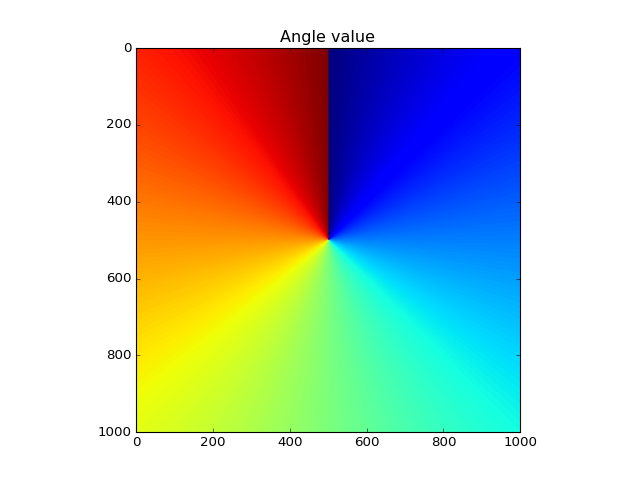

In [201]:
# removing all negative angles
angle_deg_pos = np.array(angle_deg)
for y in np.arange(height):
    for x in np.arange(width):
        _value = angle_deg[y,x]
        if _value < 0:
            angle_deg_pos[y,x] = 2*180+_value

plt.figure(1)
plt.title("Angle value")
plt.imshow(angle_deg_pos)

<IPython.core.display.Javascript object>


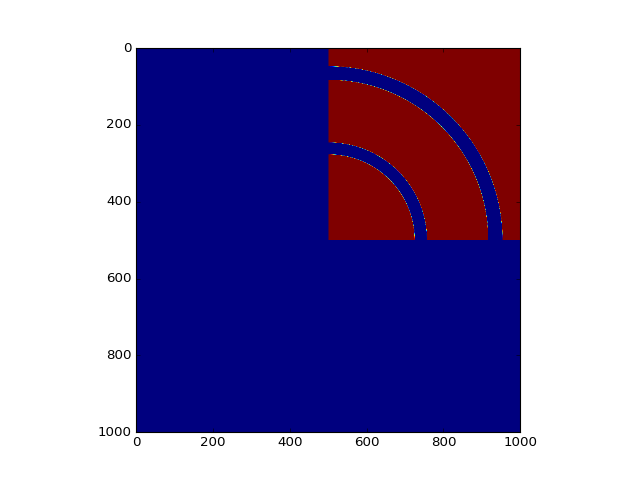

In [185]:
# find all the indices where the angle is outside the range specified and change those values to np.NaN

left_angles = angle_deg_pos >= angle_from_deg
right_angles = angle_deg_pos <= angle_to_deg

angles_to_keep = np.logical_and(left_angles, right_angles)
angles_to_not_consider = np.invert(angles_to_keep)
working_data[angles_to_not_consider]= 0

plt.figure(5)
plt.imshow(working_data)

In [187]:
ind = np.argsort(r.flat) # get sorted indices of radius
print(ind)
print(np.shape(ind))

[500500 501500 499500 ...,    999      1      0]
(1000000,)


In [188]:
sr = r.flat[ind] # sorted radii
print(sr)

[   0.            1.            1.         ...,  706.40002831  706.40002831
  707.10678119]


In [189]:
sim = working_data.flat[ind] # image values sorted by radii
print(sim)
print(np.shape(sim))

[255   0 255 ..., 255   0   0]
(1000000,)


In [190]:
ri = sr.astype(np.int32) # integer part of radii (bin size = 1)
# determining distance between changes
deltar = ri[1:] - ri[:-1] # assume all radii represented
print(deltar)

[1 0 0 ..., 0 0 1]


In [191]:
rind = np.where(deltar)[0] # location of changed radius
print(rind)

[     0      8     24     44     68    108    144    192    248    304
    372    436    516    608    696    792    888   1004   1124   1244
   1368   1512   1648   1788   1940   2108   2284   2448   2616   2808
   2996   3204   3404   3612   3840   4048   4280   4508   4764   5012
   5248   5520   5784   6072   6348   6620   6916   7208   7520   7824
   8160   8484   8796   9140   9464   9840  10184  10544  10908  11276
  11668  12056  12448  12848  13236  13668  14068  14492  14944  15360
  15808  16236  16716  17180  17644  18120  18600  19096  19572  20068
  20588  21088  21624  22128  22664  23212  23756  24308  24832  25432
  25984  26560  27140  27724  28332  28912  29512  30144  30752  31396
  32004  32668  33312  33936  34608  35252  35948  36620  37284  37968
  38656  39376  40076  40788  41532  42252  42968  43704  44456  45212
  45964  46700  47472  48296  49048  49856  50612  51428  52252  53040
  53880  54688  55552  56396  57196  58076  58928  59800  60664  61516
  6242

In [192]:
nr = rind[1:] - rind[:-1] # number in radius bin
print(nr)

[   8   16   20   24   40   36   48   56   56   68   64   80   92   88   96
   96  116  120  120  124  144  136  140  152  168  176  164  168  192  188
  208  200  208  228  208  232  228  256  248  236  272  264  288  276  272
  296  292  312  304  336  324  312  344  324  376  344  360  364  368  392
  388  392  400  388  432  400  424  452  416  448  428  480  464  464  476
  480  496  476  496  520  500  536  504  536  548  544  552  524  600  552
  576  580  584  608  580  600  632  608  644  608  664  644  624  672  644
  696  672  664  684  688  720  700  712  744  720  716  736  752  756  752
  736  772  824  752  808  756  816  824  788  840  808  864  844  800  880
  852  872  864  852  912  872  896  900  912  936  908  912  952  944  948
  920  976  948 1000  960  976 1020  960 1000 1004 1056 1024  996 1040 1032
 1080 1028 1024 1096 1076 1080 1064 1112 1108 1080 1112 1084 1152 1136 1108
 1144 1168 1176 1116 1168 1200 1172 1184 1168 1192 1228 1176 1248 1196 1248
 1248 1224 1

In [193]:
csim = np.cumsum(sim, dtype=np.float64) # cumulative sum to figure out sums for each radii bin
tbin = csim[rind[1:]] - csim[rind[:-1]] # sum for image values in radius bins
radial_profile = tbin/nr # the answer

<IPython.core.display.Javascript object>


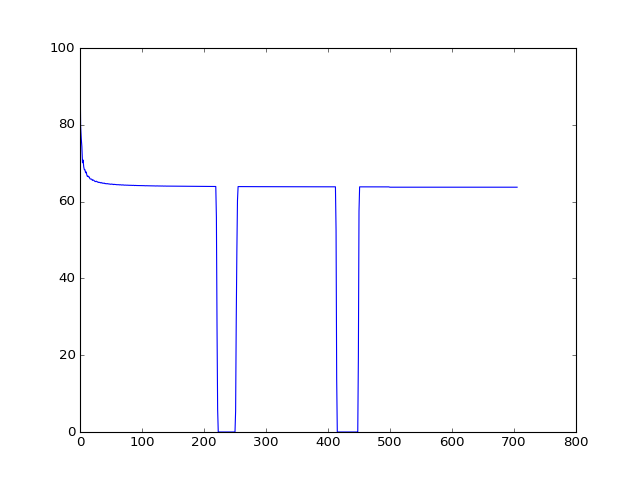

In [194]:
plt.figure(3)
plt.plot(radial_profile)
